# Round 2. Implementing the Watts-Strogatz small-world model

In this exercise, you will implement the Watts-Strogatz small-world model [?], which is a very simple network model that yields small diameter as well as high level of clustering. In practice, the Watts-Strogatz model is a ring lattice where some of the links have been randomly rewired. 
The model has three parameters: network size N , m (each node on the ring connects to m nearest neighbors both to the left and to the right), and p, the probability of rewiring one end of each link to a random endpoint node.

To get you started, you may use this notebook OR the accompanying Python template `implementing_ws_model.py` available in MyCourses. The usage of the notebook or template is fully **optional**. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Begin of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Begin of the Exercise
Write your code here to implement the Watts-Strogatz small-world model

### a. Watts-Strogatz small world model
Implement the Watts-Strogatz small world model and visualize the network using $N=15$, $m=2$, $p=0.1$, and $N=100$, $m=2$, $p=0.5$ using a circular layout algorithm `nx.draw_circular(G)`, and check that the networks look right. For each network, report the total number of links and also the number of rewired links.
**Note**: NetworkX has a ready-made function for small-world networks but here the task is to program your own function, so do not use it (except for checking results, if in doubt).

In [2]:
def ring(n, m):
    """
    This function creates the basic ring (to be rewired) with n nodes
    in which each node is connected to m nodes on the left and right.

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right

    Returns
    -------
    network : graph
             The basic ring before rewiring
    """
    G = nx.Graph()
    for i in range(0,n):
        for e in range(1, m+1):
            right=i+e
            if(right>=n):
                right=right-n
            left=i-e
            if(left<0):
                left=left+n
            
            G.add_edge(i, right)
            G.add_edge(i, left)
            
    nx.draw_circular(G,with_labels=True)
    return G

In [3]:
def ws(n, m, p):
    """
    This function call the ring() function to make a basic ring and then
    rewires each link with  probability p and also prints the total number of
    links and the number of rewired links.
    Note self-loops are not allowed when rewiring (check that you do not rewire
    the end of a link to the node at its other end!)

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right
    p : float
        Rewiring probability

    Returns
    -------
    network : graph
        The Watts-Strogatz small-world network

    """
    network = ring(n, m)
    edges = network.edges()
    rewired_num = 0 # tracks the number of rewired links
    total_num = 0 # tracks the total number of links in the network
    # You should rewire each edge if: numpy.random.rand() < p
    # Also, avoid duplicate links (rewiring to a neighbor of the other node)
    # as well as self-links (rewiring one endpoint to the other)
    # You might find these useful: random.choice and nx.non_neighbors
    # The latter yields an iterator: NN=nx.non_neighbors(G,i) lists all nodes
    # that are not connected to i (and are not i)
    # YOUR CODE HERE
    for edge in network.edges:
        if (np.random.rand() < p):
            chosen_node=np.random.choice(network.nodes)
            if(chosen_node not in nx.non_neighbors(network, edge[0])):
                network.remove_edge(edge[0],edge[1])
                network.add_edge(edge[0],chosen_node)
                rewired_num+=1
        total_num+=1
    
    
    
    
    #raise NotImplementedError()
    #print total number of links in the graph and number of rewired links:
    print("total number of links:")
    print(total_num)
    print("number of rewired links:")
    print(rewired_num)
    return network

total number of links:
60
number of rewired links:
4


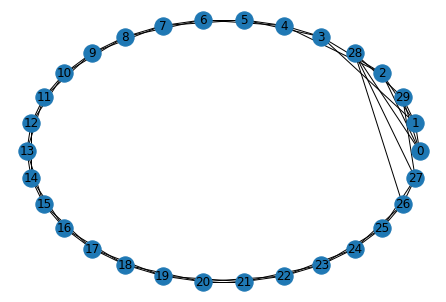

In [4]:
ws(30, 2, .5)

total number of links:
30
number of rewired links:
0
Total number of edges for n = 15, m = 2, p = 0 :
30
total number of links:
200
number of rewired links:
4


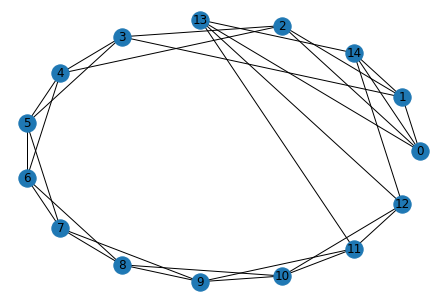

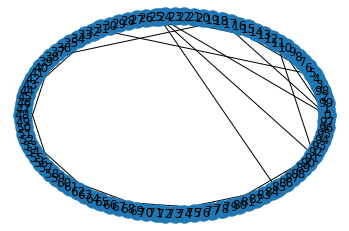

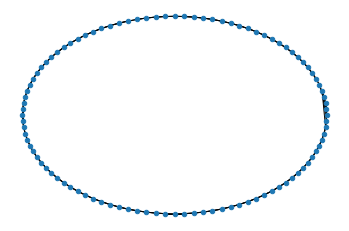

In [5]:
np.random.seed(42)
#visualizing the rings for p = 0 ...
graph1 = ws(15, 2, .1)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
nx.draw_circular(graph1)

figure_filename = './WS_1.pdf'

fig1.savefig(figure_filename)
# or just use plt.show() and save manually

total_num_edges = len(list(graph1.edges()))
print("Total number of edges for n = 15, m = 2, p = 0 :")
print(total_num_edges)
#... and p = 0.5
graph2 = ws(100, 2, 0.5)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
nx.draw_circular(graph2, node_size=20)

figure_filename = './WS_2.pdf'

fig2.savefig(figure_filename)
# or just use plt.show() and save manually

### b. Relative average clustering coefficient
Plot the relative average clustering coefficient $c(p)/c(p=0)$ and average shortest path length $l(p)/l(p=0)$ vs. $p$ in your network, for $p = 0.001, . . . , 1.0$ (see template or the notebook for the log-spaced values). Here, relative=average value for given p divided by the same value for $p=0$. Use $N=500$ and $m=2$. Use a logarithmic x-axis in your plot (ax.semilogx). Check that your results are in line with the plots in the lecture slides.

total number of links:
1000
number of rewired links:
0
total number of links:
1000
number of rewired links:
0


<ipython-input-7-b17b8af54cae>:27: RuntimeWarning: divide by zero encountered in log
  l_rewired+=np.log(largest_component)


total number of links:
1000
number of rewired links:
0
total number of links:
1000
number of rewired links:
0
total number of links:
1000
number of rewired links:
0
total number of links:
1000
number of rewired links:
1
total number of links:
1000
number of rewired links:
2
total number of links:
1000
number of rewired links:
1
total number of links:
1000
number of rewired links:
3
total number of links:
1000
number of rewired links:
7
total number of links:
1000
number of rewired links:
9


ValueError: x and y must have same first dimension, but have shapes (11,) and (0,)

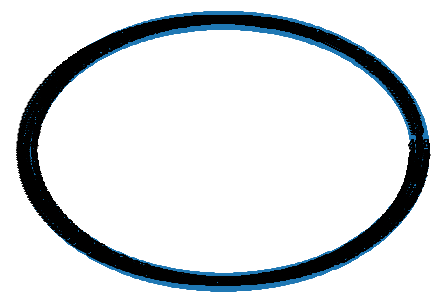

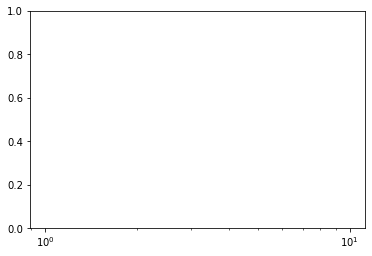

In [7]:
# Produce the basic ring network and calculate the average clustering
# coefficient and average shortest path of the network
basic_ring = ring(500, 2)

c_basic = nx.average_clustering(basic_ring, count_zeros=True) # Replace!
l_basic = nx.average_shortest_path_length(basic_ring) # Replace!
# YOUR CODE HERE
#raise NotImplementedError()

probability = [0.001*(2**n) for n in range(11)] #[0.001, 0.002, 0.004, ...]
relative_c = []
relative_l = []

for p in probability:
    smallworld = ws(500, 2, p)

    # gets all connected components; mostly there is just one:
    components = (smallworld.subgraph(c) for c in nx.connected_components(smallworld))

    # finds the largest to be used for the average path length:
    largest_component = max(components, key=len)

    c_rewired = 0
    c_rewired*= p # Replace!
    #c_rewired+= nx.average_clustering(graph, count_zeros=True) # Replace!
    l_rewired = 0 # Replace!
    l_rewired+=np.log(largest_component)
    # Update relative_c and relative_l
    # YOUR CODE HERE
    #raise NotImplementedError()

fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.semilogx(probability, relative_c, marker='o', ls='', color='b', label='relative avg c')
ax.semilogx(probability, relative_l, marker='o', ls='', color='r', label='relarive avg shortest path')

# Label the axes
# YOUR CODE HERE
#raise NotImplementedError()

figure_filename = 'WS_relative_c_and_l.pdf'

fig3.savefig(figure_filename)
# or just use plt.show() and save manually